# Build an MLP from scracth
Follow the steps from: https://medium.com/@mn05052002/building-a-simple-mlp-from-scratch-using-pytorch-7d50ca66512b

## Imports

In [5]:
import logging
import sys

from dotenv import load_dotenv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


# LOGGER
logger = logging.getLogger()
logging.basicConfig(
    stream=sys.stdout,
    level=logging.INFO,
    format='%(asctime)s %(message)s',
    datefmt='%Y-%m-%y %H:%M:%S',
)


# MODULE RELOAD
%load_ext autoreload
%autoreload 2


# Load dotenv
_ = load_dotenv()

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


## Generate training data

In [19]:
from torch.utils.data import DataLoader, TensorDataset

# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


# Create data_loaders
train_data = DataLoader(
    TensorDataset(
        torch.tensor(X_train, dtype=torch.float32),
        torch.tensor(y_train, dtype=torch.float32)
    ),
    batch_size=64,
    shuffle=True,
)
test_data = DataLoader(
    TensorDataset(
        torch.tensor(X_test, dtype=torch.float32),
        torch.tensor(y_test, dtype=torch.float32)
    ),
    batch_size=64,
    shuffle=True,
)

<Axes: >

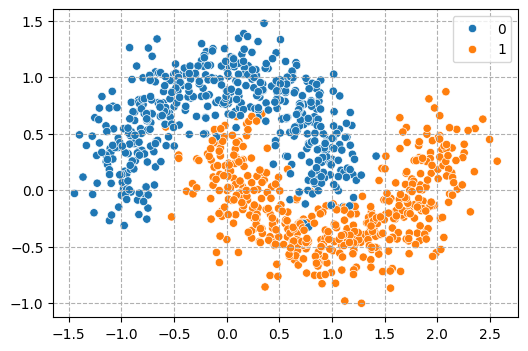

In [11]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    hue_order=[0, 1],
    
)

## Define simple MLP

In [38]:
class BasicMLP(nn.Module):
    """My Basic MLP"""

    def __init__(
        self,
        input_size,
        hidden_size,
        output_size,
    ):
        super(BasicMLP, self).__init__()
        # Set up layers manually
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

        # Intermediate and final activation layers
        self.relu = F.relu
        self.sigmoid = F.sigmoid

        def forward(self, x):
            # Apply layer
            x = self.relu(self.linear1(x))
            x = self.relu(self.linear2(x))

            x = self.sigmoid(x)

            return x

## Train model

### Set up model

In [39]:
model = BasicMLP(
    input_size=2,
    hidden_size=64,
    output_size=1,
)

### Define trainer

In [ ]:
def train(data, loss_fn, optimizer):
    """Do training"""
    # Get data
    for batch in data:
        X, y = batch